In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
Net = 'EfficientNet'



In [137]:

if Net == 'EfficientNet':
    path = 'exp_up_10_efficientnet/'  # the path of output file
    Repeat = 2  # number of experiments

In [138]:
# Total_budget//period

In [139]:
# np.mean(data[::3,1,-20:],axis = 1).shape

In [140]:
path+name+'.npy'

'exp_up_10_efficientnet/CIFAR10_additional_0.npy'

In [141]:
Total_budget = 60
period = 10

# path = 'exp_10_2/'
for dataset_name in ['CIFAR10']:
    
    Models = np.zeros((6,Total_budget//period,Repeat ))
    
  
    
    for run_index in range(Repeat):


        name =  f'CIFAR10_additional_{run_index}'
    #     np.save(path+name+'.npy', results)
        result = np.load(path+name+'.npy',allow_pickle=True)
        
        for j in range(6):
            data = result[j]
            Models[j,:,run_index] = np.mean(data[::period,1,-20:],axis = 1)
        

        

In [142]:
# Status_list1

In [143]:
#


In [144]:
Summaray = np.zeros((6,Total_budget//period))
Summaray_var = np.zeros((6,Total_budget//period))
for j in range(6):
    for i in range(Total_budget//period):
        Summaray[j,i] = np.mean(Models[j,i,:])
        
        Summaray_var[j,i] = np.var(Models[j,i,:])

In [145]:
Summaray

array([[0.296015 , 0.347895 , 0.359765 , 0.35694  , 0.3606225, 0.401305 ],
       [0.275005 , 0.3051275, 0.2995625, 0.3240125, 0.3338475, 0.3361625],
       [0.2723825, 0.321405 , 0.318595 , 0.325865 , 0.3344175, 0.35169  ],
       [0.2916525, 0.2923025, 0.3085975, 0.330325 , 0.3426925, 0.3309025],
       [0.286375 , 0.299525 , 0.3128825, 0.3113325, 0.3293075, 0.35443  ],
       [0.274165 , 0.3136625, 0.3244475, 0.32254  , 0.3235675, 0.3573775]])

In [146]:
# fig=plt.figure(dpi=500)
# # font1={'font.family':'serif',
#         'font.serif':'Times New Roman',
#         'font.style':'normal',
#         # 'font.weight':'bold'}#or large,small

       
plt.rcParams.update(font1)
plt.rcParams['text.usetex'] = False

# ax = fig.add_subplot(111)
# plt.rc('xtick', labelsize=18) 
# plt.rc('ytick', labelsize=18) 
# plt.rc('axes', labelsize=18) 
# plt.rc('axes', titlesize=18) 
# plt.rc('legend', fontsize=12)

In [147]:
def plot_with_variance(reward_mean, reward_std, color='yellow',Label='test',savefig_dir=None,xaxis =None):
    """plot_with_variance
        reward_mean: typr list, containing all the means of reward summmary scalars collected during training
        reward_std: type list, containing all variance
        savefig_dir: if not None, this must be a str representing the directory to save the figure
    """
    half_reward_std = reward_std / 2.0
    lower = [x - y for x, y in zip(reward_mean, half_reward_std)]
    upper = [x + y for x, y in zip(reward_mean, half_reward_std)]
    if xaxis is None:
        xaxis = list(range(len(lower)))
    # plt.fill_between(xaxis, lower, upper, color=color[0], alpha=0.2)
    plt.fill_between(xaxis, lower, upper, color=color[0], alpha=0.2)
    plt.plot(xaxis, reward_mean, color,label=Label)
    
#     plt.grid()
#     plt.xlabel('Episode')
#     plt.ylabel('Average reward')
#     plt.title('The convergence of rewards')
    if savefig_dir is not None and type(savefig_dir) is str:
        plt.savefig(savefig_dir, format='svg')
    # plt.rc('xtick', labelsize=18) 
    # plt.rc('ytick', labelsize=18) 
    # plt.rc('axes', labelsize=18) 
    # plt.rc('axes', titlesize=18) 
    # plt.rc('legend', fontsize=12)
#     plt.show()

In [148]:
color_space = ['r','g','b','y' ,'m','k-.']


In [149]:
# plot_with_variance(Summaray[j,:],np.sqrt(Summaray_var[j,:]),color='m')

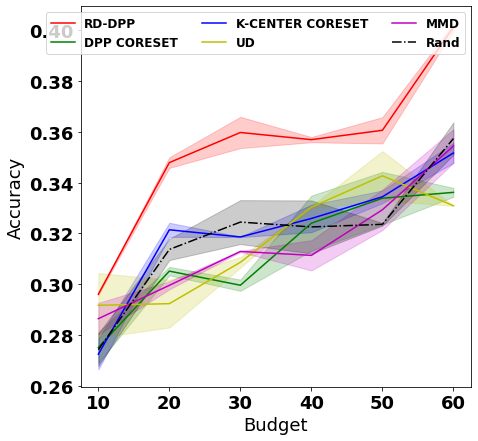

In [150]:
plt.figure(figsize= (7,7))


xaxis = np.array(range(1,1+Total_budget//period))*period

for j in range(6):
        idx = j
        plot_with_variance(Summaray[idx,:],np.sqrt(Summaray_var[idx,:]),color = color_space[j],xaxis=xaxis,Label=L2[j])

plt.xlabel('Budget')
plt.ylabel('Accuracy')
# plt.legend(['rand','entropy','min-margin','margin gain','dpp','ada 0.5', 'ada 0.2'])
# L = ['Rand','Uncertainty Dec.','Min Margin Dec.','Marginal Rate Gain','RD-DPP (only diversity)','RD-DPP (Two stage)']

# L2 = ['RD-DPP','DPP CORESET','K-CENTER CORESET','UD','MMD','Rand']
# plt.legend(np.array(L2),ncol=3)
plt.legend(ncol=3)
# plt.axvline(avg_trans*period,color='gray',linestyle=':')
# plt.savefig(f'{Net}_{dataset_name}_{period}.png', bbox_inches = 'tight')

In [124]:
# save to csv


In [125]:
S=Summaray
SVAR = Summaray_var

In [126]:
per1 = np.zeros(S.shape,dtype=object)


In [127]:
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per1[i,j] = format(S[i,j]*100,'.2f')

In [128]:
S.shape

(6, 6)

In [129]:
import pandas as pd
df1 = pd.DataFrame(per1, columns = xaxis, index =np.array(L2))


In [130]:
df1

,10,20,30,40,50,60
RD-DPP,29.56,35.21,34.74,35.49,35.03,39.85
DPP CORESET,26.27,30.18,29.51,30.23,31.31,33.27
K-CENTER CORESET,28.44,32.70,31.85,31.51,32.94,34.38
UD,26.62,27.35,30.45,33.11,32.32,33.08
MMD,27.39,30.27,31.25,29.94,31.33,36.76
Rand,26.13,30.53,30.71,30.17,32.46,34.46


In [131]:
# df1.to_csv(f'{Net}_{dataset_name}_1_{period}.csv') 

In [134]:
per2 = np.zeros((S.shape),dtype=object)
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per2[i,j] = format(S[i,j]*100,'.2f')+'+-'+format(np.sqrt(SVAR[i,j])*100,'.2f')

In [136]:
df2 = pd.DataFrame(per2, columns = xaxis, index =np.array(L2))
df2

,10,20,30,40,50,60
RD-DPP,29.56+-0.00,35.21+-0.00,34.74+-0.00,35.49+-0.00,35.03+-0.00,39.85+-0.00
DPP CORESET,26.27+-0.00,30.18+-0.00,29.51+-0.00,30.23+-0.00,31.31+-0.00,33.27+-0.00
K-CENTER CORESET,28.44+-0.00,32.70+-0.00,31.85+-0.00,31.51+-0.00,32.94+-0.00,34.38+-0.00
UD,26.62+-0.00,27.35+-0.00,30.45+-0.00,33.11+-0.00,32.32+-0.00,33.08+-0.00
MMD,27.39+-0.00,30.27+-0.00,31.25+-0.00,29.94+-0.00,31.33+-0.00,36.76+-0.00
Rand,26.13+-0.00,30.53+-0.00,30.71+-0.00,30.17+-0.00,32.46+-0.00,34.46+-0.00
